In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

import uvinitial

In [2]:
import numpy
uvinitial = numpy.load('/home/davidzhang9210/workspace/uvinitial.npz')
U = uvinitial['U']
V = uvinitial['V']

In [3]:
U

array([[ 1.03341932,  1.00909902,  1.03523907, ...,  1.01236   ,
         1.02769296,  1.01185515],
       [ 1.02049366,  1.03874603,  1.03186003, ...,  1.00917594,
         1.00648275,  1.01929723],
       [ 1.0297385 ,  1.02874589,  1.02488765, ...,  1.0345737 ,
         1.00195443,  1.03189674],
       ..., 
       [ 1.03851006,  1.01833226,  1.00260628, ...,  1.00514165,
         1.04292736,  1.0090857 ],
       [ 1.03951143,  1.0425582 ,  1.03609776, ...,  1.00643229,
         1.04094253,  1.03869138],
       [ 1.01132752,  1.00554757,  1.00241105, ...,  1.04435044,
         1.02683595,  1.01239924]])

In [4]:
V

array([[ 0.04286057,  0.01747253,  0.03235064, ...,  0.0283667 ,
         0.03892816,  0.0255146 ],
       [ 0.03567483,  0.04898278,  0.03607639, ...,  0.02100673,
         0.0305137 ,  0.00374435],
       [ 0.04936444,  0.0423903 ,  0.00414055, ...,  0.02084643,
         0.03015715,  0.03085144],
       ..., 
       [ 0.03707045,  0.03856759,  0.01737007, ...,  0.00421018,
         0.03256909,  0.00247397],
       [ 0.04781775,  0.00190273,  0.02729943, ...,  0.02507722,
         0.0468819 ,  0.00760259],
       [ 0.01798466,  0.02495585,  0.04354743, ...,  0.00184759,
         0.01039884,  0.01832535]])

According to link http://stackoverflow.com/questions/21071128/matplotlib-plot-numpy-matrix-as-0-index

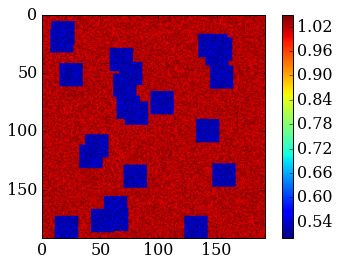

In [5]:
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
pyplot.imshow(U)
pyplot.colorbar()
pyplot.show()

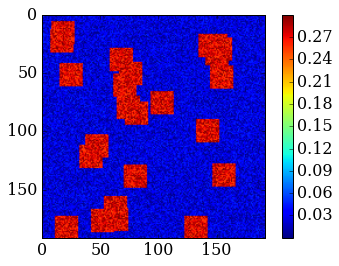

In [6]:
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
pyplot.imshow(V)
pyplot.colorbar()
pyplot.show()

According to Module 4 Lesson 3

In [7]:
def ftcs(U, V, Du, Dv, dx, dy, nt, dt, F, k):
    
    alpha = Du*dt/(dx**2)
    beta = Du*dt/(dy**2)
    delta = Dv*dt/(dx**2)
    gamma = Dv*dt/(dy**2)
    
    for n in range (nt):
    
        Un = U.copy()
        Vn = V.copy()
        U[1:-1, 1:-1] = (alpha*Un[1:-1, 1:-1]+
                (1-Vn[1:-1, 1:-1]**2*dt - 2*alpha - 2*beta - F*dt)*Un[1:-1, 1:-1]+ 
                alpha*Un[:-2, 1:-1] + 
                beta*(Un[1:-1, 2:] - 2*Un[1:-1, 1:-1] + Un[1:-1,:-2])+
                F*dt)
        V[1:-1, 1:-1] = (delta*Vn[2: , 1:-1] + \
                (1-(F+k)- 2*delta - 2*gamma)*Vn[1:-1, 1:-1]+\
                delta*Vn[:-2, 1:-1]+ \
                gamma*(Vn[1:-1, 2: ] - 2*Vn[1:-1, 1:-1] + Vn[1:-1, :-2])+\
                Un[1:-1, 1:-1]*(Vn[1:-1,1:-1]**2)*dt)
        #Neumann bounday conditions
        U[0, :] = U[1, :]
        U[-1,:] = U[-2,:]
        U[:, 0] = U[:, 1]
        U[:, -1] = U[:, -2]
        V[0, :] = V[1, :]
        V[-1,:] = V[-2,:]
        V[:, 0] = V[:, 1]
        V[:, -1] = V[:, -2]
    return U, V 
             

In [8]:
#initialize
n = 192
Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065
dh = 5./(n-1)
dx=dh
dy=dh
T = 8000
dt = 0.9*dh**2/(4*max(Du, Dv))
nt = int(T/dt)
Ui = U.copy()
Vi = V.copy()

In [9]:
Uresult,Vresult=ftcs(Ui, Vi, Du, Dv, dx, dy, nt, dt, F, k)

In [ ]:
Uresult